To measure mKate2_mKate2_astrin intensities 

In [1]:
# import necessary modules
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import skimage.filters as filters
import skimage.color as color
from PIL import Image
import pandas as pd
from skimage.util import img_as_float
from skimage.color import label2rgb, rgb2gray,gray2rgb
from skimage import segmentation,morphology,feature,measure,filters
from scipy import ndimage as ndi
import glob
from natsort import natsorted 
import os
import glob
import re

In [2]:
# import function file
%run functions-Cytoplasm-Method1.ipynb

In [3]:
# path to the local folder for the notebooks
# change path to your folders accordingly
BASE_DIR="/Users/Trupti/01-LIDo/02-VijiProject/ImageAnalysis/" 
#path to the image folder. # change the name of the folder for different dataset
FOLDER="set4/"
IMAGE_DIR=BASE_DIR + "data/XMovie/" + FOLDER
CSV_DIR = BASE_DIR + "AnalysisMethods/AnalysisResults/XMovie/" + FOLDER +"/" + "csvs/"


#### A List for the Images Folders

In [4]:
dmso=[]
cdki=[]
dmso_path = IMAGE_DIR + 'dmso'
cdki_path=IMAGE_DIR + 'cdki'

for folder in glob.glob(dmso_path + '/*'):
    dmso.append(dmso_path + '/' + folder.split('/')[-1].split('.')[0])
for folder in glob.glob(cdki_path + '/*'):
    cdki.append(cdki_path + '/' + folder.split('/')[-1].split('.')[0])     


In [5]:
# For DMSO

for i in range(len(dmso)):
    
    df_nuf2_GFP,df_mKate2_astrin,nuf2_GFP_cyto,mKate2_astrin_cyto,nuf2_GFP_bg,mKate2_astrin_bg=method_astrin(dmso[i])
    
    df=pd.merge(df_nuf2_GFP, df_mKate2_astrin,  how='outer',on=['label']
                                                       ,suffixes=('_nuf2_GFP', '_mKate2_astrin'))
    df['nuf2_GFP_cyto']=nuf2_GFP_cyto
    df['mKate2_astrin_cyto']=mKate2_astrin_cyto
    df['nuf2_GFP_bg']=nuf2_GFP_bg
    df['mKate2_astrin_bg']=mKate2_astrin_bg
    
    directory=dmso[i].split('/')[-1].split('.')[0] # to create a folder per experiment to save csvs
    path = CSV_DIR + 'dmso/' + directory
    try:
        os.makedirs(path)
    except FileExistsError:
    # directory already exists
        pass
    check_nan_in_df = df.isnull().values.any()
    print("There are %d NaN values in %s " %(check_nan_in_df , directory))
    
  
    df.to_csv(path + '/' + 'particles'+'.csv') 
   

There are 0 NaN values in Expt2020_017_setIV_STLC_MG132_DMSO_Nuf2-GFP_mKate2-Astrin_GFP_mCherry_cell05_R3D_D3D 
There are 0 NaN values in Expt2020_017_setIV_STLC_MG132_DMSO_Nuf2-GFP_mKate2-Astrin_GFP_mCherry_cell03_R3D_D3D 
There are 0 NaN values in Expt2020_017_setIV_STLC_MG132_DMSO_Nuf2-GFP_mKate2-Astrin_GFP_mCherry_cell02_R3D_D3D 


In [6]:
# For CDKi

for i in range(len(cdki)):
    
    df_nuf2_GFP,df_mKate2_astrin,nuf2_GFP_cyto,mKate2_astrin_cyto,nuf2_GFP_bg,mKate2_astrin_bg=method_astrin(cdki[i])
    
    df=pd.merge(df_nuf2_GFP, df_mKate2_astrin,  how='outer',on=['label']
                                                       ,suffixes=('_nuf2_GFP', '_mKate2_astrin'))
    df['nuf2_GFP_cyto']=nuf2_GFP_cyto
    df['mKate2_astrin_cyto']=mKate2_astrin_cyto
    df['nuf2_GFP_bg']=nuf2_GFP_bg
    df['mKate2_astrin_bg']=mKate2_astrin_bg
    
    directory=cdki[i].split('/')[-1].split('.')[0] # to create a folder per experiment to save csvs
    path = CSV_DIR + 'cdki/' + directory
    try:
        os.makedirs(path)
    except FileExistsError:
    # directory already exists
        pass
    check_nan_in_df = df.isnull().values.any()
    print("There are %d NaN values in %s " %(check_nan_in_df , directory))
    df.to_csv(path + '/' + 'particles'+'.csv') 
   

There are 0 NaN values in Expt2020_017_setIV_STLC_MG132_RO_Nuf2-GFP_mKate2-Astrin_GFP_mCherry_cell08_a01_R3D_D3D 
There are 0 NaN values in Expt2020_017_setIV_STLC_MG132_RO_Nuf2-GFP_mKate2-Astrin_GFP_mCherry_cell05_b_11min01_R3D_D3D 
There are 0 NaN values in Expt2020_017_setIV_STLC_MG132_RO_Nuf2-GFP_mKate2-Astrin_GFP_mCherry_cell03_b_14min01_R3D_D3D 


In [7]:
df.head()

,label,mean_intensity_nuf2_GFP,fname_nuf2_GFP,mean_intensity_mKate2_astrin,fname_mKate2_astrin,nuf2_GFP_cyto,mKate2_astrin_cyto,nuf2_GFP_bg,mKate2_astrin_bg
0,0_1,13500.000000,Expt2020_017_setIV_STLC_MG132_RO_Nuf2-GFP_mKat...,9574.258065,Expt2020_017_setIV_STLC_MG132_RO_Nuf2-GFP_mKat...,7582.235132,4636.918068,5311.3025,2633.66
1,0_2,16889.120690,Expt2020_017_setIV_STLC_MG132_RO_Nuf2-GFP_mKat...,10028.224138,Expt2020_017_setIV_STLC_MG132_RO_Nuf2-GFP_mKat...,7582.235132,4636.918068,5311.3025,2633.66
2,0_3,15494.083333,Expt2020_017_setIV_STLC_MG132_RO_Nuf2-GFP_mKat...,11088.833333,Expt2020_017_setIV_STLC_MG132_RO_Nuf2-GFP_mKat...,7582.235132,4636.918068,5311.3025,2633.66
3,0_4,17068.861111,Expt2020_017_setIV_STLC_MG132_RO_Nuf2-GFP_mKat...,8735.861111,Expt2020_017_setIV_STLC_MG132_RO_Nuf2-GFP_mKat...,7582.235132,4636.918068,5311.3025,2633.66
4,0_5,16333.890909,Expt2020_017_setIV_STLC_MG132_RO_Nuf2-GFP_mKat...,9931.336364,Expt2020_017_setIV_STLC_MG132_RO_Nuf2-GFP_mKat...,7582.235132,4636.918068,5311.3025,2633.66


### Plots

In [8]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook",font_scale=1, rc={"lines.linewidth":2.5})

# path to save graphs
GRAPH_DIR=BASE_DIR + "AnalysisMethods/AnalysisResults/XMovie/" + FOLDER + "/" + "graphs/"


In [9]:
# plot graphs 
# dmso vs cdki
# The paths are for the generated csv files
dmso_csv=[]
cdki_csv=[]
dmso_path = CSV_DIR + 'dmso'
cdki_path=CSV_DIR + 'cdki'

for folder in natsorted(glob.glob(dmso_path + '/*')):
    dmso_csv.append(dmso_path + '/' + folder.split('/')[-1].split('.')[0])
    
for folder in natsorted(glob.glob(cdki_path + '/*')):
    cdki_csv.append(cdki_path + '/' + folder.split('/')[-1].split('.')[0])  
 

In [10]:
# read both csvs to a dataframe
cell_count=0
df_graph=pd.DataFrame()
for i in range(len(cdki_csv)):
    df_cdki_bg=pd.read_csv(cdki_csv[i]+'/'+'Particles.csv')
    df_temp_cdki=pd.DataFrame(data=(df_cdki_bg['mean_intensity_mKate2_astrin']))
    df_temp_cdki['mean_intensity_nuf2_GFP']=df_cdki_bg['mean_intensity_nuf2_GFP']
    df_temp_cdki['mKate2_astrin@kt/mKate2_astrin@cyto']= df_cdki_bg['mean_intensity_mKate2_astrin']/df_cdki_bg['mKate2_astrin_cyto']
    df_temp_cdki['nuf2_GFP@kt/nuf2_GFP@cyto']= df_cdki_bg['mean_intensity_nuf2_GFP']/df_cdki_bg['nuf2_GFP_cyto']
    df_temp_cdki['mKate2_astrin@kt/mKate2_astrin@cyto:nuf2_GFP@kt/nuf2_GFP@cyto']= df_temp_cdki['mKate2_astrin@kt/mKate2_astrin@cyto'] / df_temp_cdki['nuf2_GFP@kt/nuf2_GFP@cyto']
    #df_temp_cdki['nuf2_GFP@kt/nuf2_GFP@cyto:mKate2_astrin@kt/mKate2_astrin@cyto']= df_temp_cdki['nuf2_GFP@kt/nuf2_GFP@cyto'] /df_temp_cdki['mKate2_astrin@kt/mKate2_astrin@cyto'] 
    df_temp_cdki['condition']='cdki'
    expt_name=re.sub(r'^.+/([^/]+)$', r'\1', cdki_csv[i])
    df_temp_cdki['Experiment']= expt_name#'cdki_%d'%i
    
    df_dmso_bg=pd.read_csv(dmso_csv[i]+'/'+'Particles.csv')
    df_temp_dmso=pd.DataFrame(data=(df_dmso_bg['mean_intensity_mKate2_astrin']))
    df_temp_dmso['mean_intensity_nuf2_GFP']=df_dmso_bg['mean_intensity_nuf2_GFP']
    df_temp_dmso['mKate2_astrin@kt/mKate2_astrin@cyto']= df_dmso_bg['mean_intensity_mKate2_astrin']/df_dmso_bg['mKate2_astrin_cyto']
    df_temp_dmso['nuf2_GFP@kt/nuf2_GFP@cyto']= df_dmso_bg['mean_intensity_nuf2_GFP']/df_dmso_bg['nuf2_GFP_cyto']
    df_temp_dmso['mKate2_astrin@kt/mKate2_astrin@cyto:nuf2_GFP@kt/nuf2_GFP@cyto']= df_temp_dmso['mKate2_astrin@kt/mKate2_astrin@cyto'] / df_temp_dmso['nuf2_GFP@kt/nuf2_GFP@cyto']
    #df_temp_dmso['nuf2_GFP@kt/nuf2_GFP@cyto:mKate2_astrin@kt/channek@cyto']= df_temp_dmso['nuf2_GFP@kt/nuf2_GFP@cyto'] / df_temp_dmso['mKate2_astrin@kt/mKate2_astrin@cyto'] 
    df_temp_dmso['condition']='dmso'
    expt_name=re.sub(r'^.+/([^/]+)$', r'\1', dmso_csv[i])
    df_temp_dmso['Experiment']= expt_name#'cdki_%d'%i
   
   
    
    df_graph=pd.concat([df_graph,df_temp_cdki,df_temp_dmso],ignore_index=True)
    df_graph['nuf2_GFP@kt/nuf2_GFP@cyto:mKate2_astrin@kt/channek@cyto']= 1/ df_graph['mKate2_astrin@kt/mKate2_astrin@cyto:nuf2_GFP@kt/nuf2_GFP@cyto']
    
    cell_count+=1

df_graph.head()

,mean_intensity_mKate2_astrin,mean_intensity_nuf2_GFP,mKate2_astrin@kt/mKate2_astrin@cyto,nuf2_GFP@kt/nuf2_GFP@cyto,mKate2_astrin@kt/mKate2_astrin@cyto:nuf2_GFP@kt/nuf2_GFP@cyto,condition,Experiment,nuf2_GFP@kt/nuf2_GFP@cyto:mKate2_astrin@kt/channek@cyto
0,9574.258065,13500.000000,2.064789,1.780478,1.159683,cdki,Expt2020_017_setIV_STLC_MG132_RO_Nuf2-GFP_mKat...,0.862305
1,10028.224138,16889.120690,2.162692,2.227459,0.970923,cdki,Expt2020_017_setIV_STLC_MG132_RO_Nuf2-GFP_mKat...,1.029948
2,11088.833333,15494.083333,2.391423,2.043472,1.170275,cdki,Expt2020_017_setIV_STLC_MG132_RO_Nuf2-GFP_mKat...,0.854500
3,8735.861111,17068.861111,1.883980,2.251165,0.836891,cdki,Expt2020_017_setIV_STLC_MG132_RO_Nuf2-GFP_mKat...,1.194898
4,9931.336364,16333.890909,2.141797,2.154232,0.994228,cdki,Expt2020_017_setIV_STLC_MG132_RO_Nuf2-GFP_mKat...,1.005806


In [11]:
# count the number of KTs in CDKi and DMSO
cdki = df_graph[df_graph['condition']=='cdki'].shape[0]
dmso = df_graph[df_graph['condition']=='dmso'].shape[0]

### mKate2_astrin@kt/mKate2_astrin@cyto

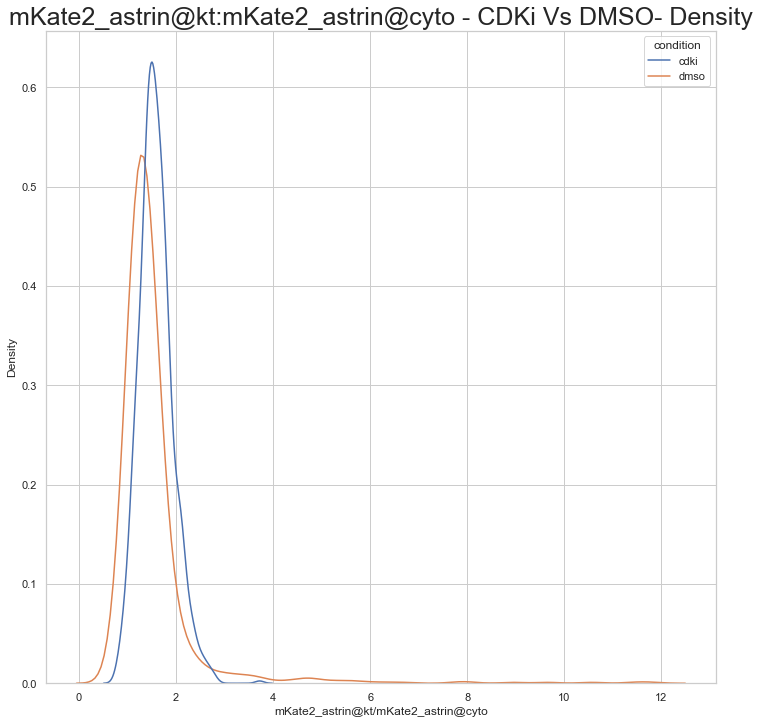

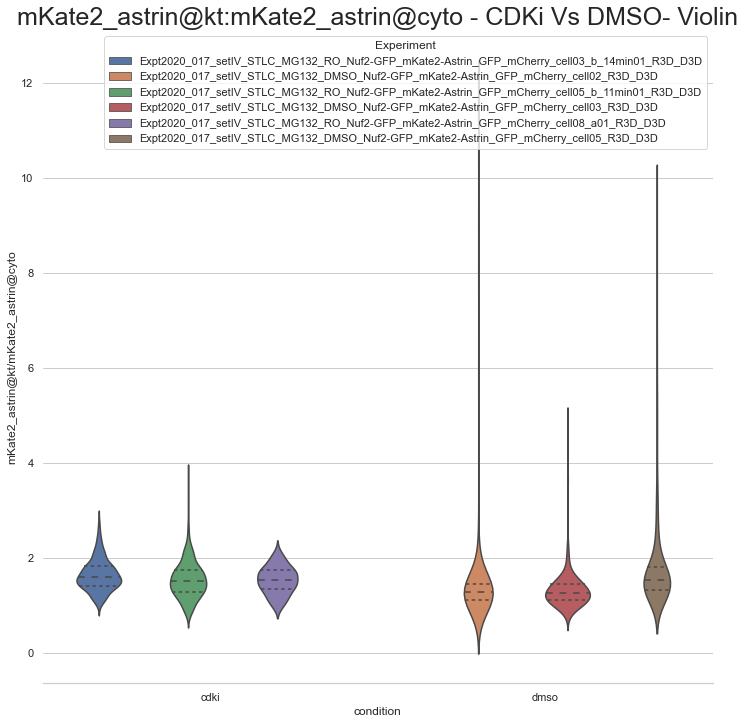

In [12]:
import seaborn as sns

title="mKate2_astrin@kt:mKate2_astrin@cyto - CDKi Vs DMSO- Density"
plt.figure(figsize=(12,12))
sns.set_theme(style="whitegrid")

sns_plot=sns.kdeplot(data=df_graph, x="mKate2_astrin@kt/mKate2_astrin@cyto",hue='condition').set_title(title,fontsize=25)
sns_plot.figure.savefig(GRAPH_DIR+title, bbox_inches="tight",dpi=300)


title="mKate2_astrin@kt:mKate2_astrin@cyto - CDKi Vs DMSO- Violin"
plt.figure(figsize=(12,12))
sns.set_theme(style="whitegrid")


# Draw a nested violinplot and split the violins for easier comparison
sns_plot=sns.violinplot(data=df_graph, x="condition", y="mKate2_astrin@kt/mKate2_astrin@cyto", hue="Experiment",
              inner="quart",
               ).set_title(title,fontsize=25)

sns_plot.figure.savefig(GRAPH_DIR+title, bbox_inches="tight",dpi=300)
sns.despine(left=True)

#title="mKate2_astrin@kt:mKate2_astrin@cyto - CDKi Vs DMSO- Box"
#plt.figure(figsize=(12,12))
#sns_plot=sns.boxplot(x="condition", y="mKate2_astrin@kt/mKate2_astrin@cyto",hue="Experiment",data=df_graph).set_title(title)
#sns_plot.figure.savefig(GRAPH_DIR+title, bbox_inches="tight",dpi=300)

#title="mKate2_astrin@kt:mKate2_astrin@cyto - CDKi Vs DMSO- Bar"
#plt.figure(figsize=(12,12))

#sns_plot = sns.barplot(
#        data=df_graph,
#        x="condition",
#        y="mKate2_astrin@kt/mKate2_astrin@cyto",
#        hue="Experiment"
#    ).set_title(title)
#sns_plot.figure.savefig(GRAPH_DIR+title, bbox_inches="tight",dpi=300)
plt.show()





### nuf2_GFP@kt : nuf2_GFP@cyto

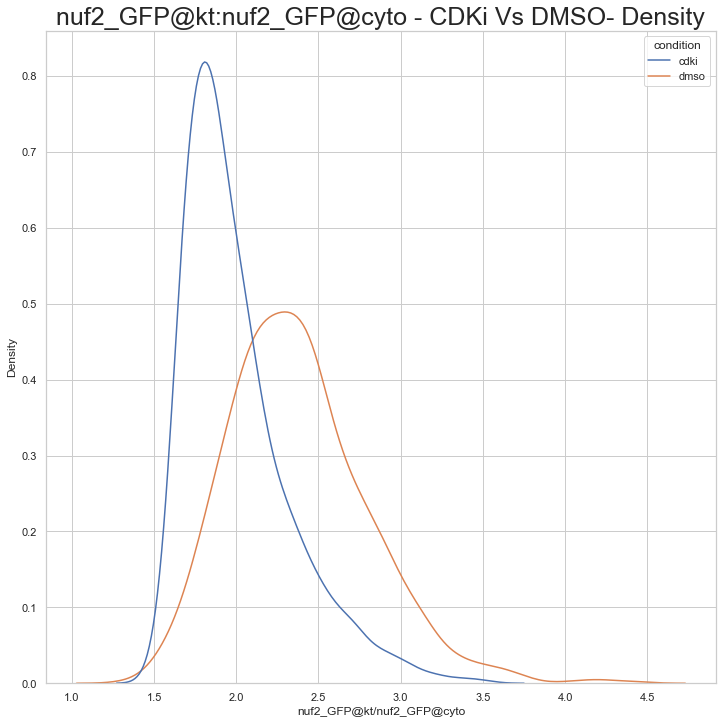

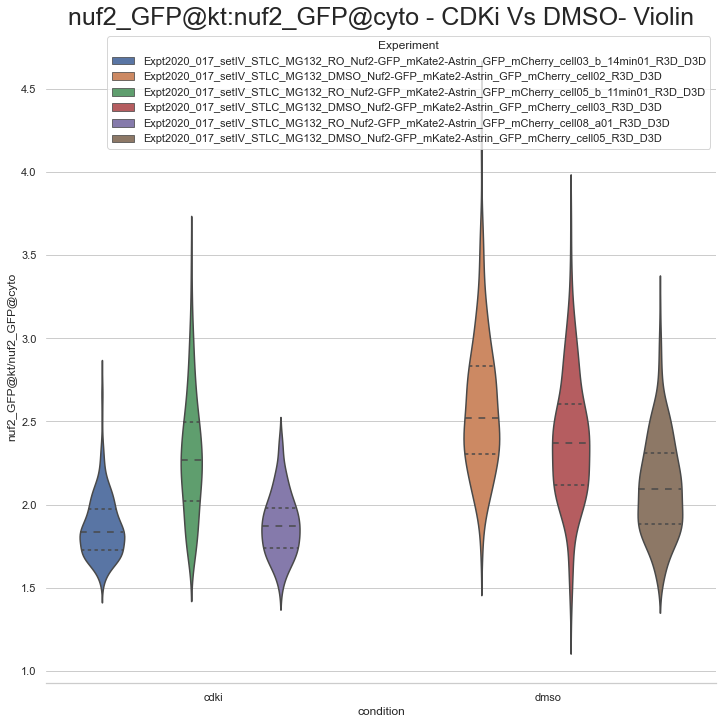

In [13]:
import seaborn as sns
title="nuf2_GFP@kt:nuf2_GFP@cyto - CDKi Vs DMSO- Density"
plt.figure(figsize=(12,12))
sns.set_theme(style="whitegrid")

sns_plot=sns.kdeplot(data=df_graph, x="nuf2_GFP@kt/nuf2_GFP@cyto",hue='condition').set_title(title,fontsize=25)
sns_plot.figure.savefig(GRAPH_DIR+title, bbox_inches="tight",dpi=300)

title="nuf2_GFP@kt:nuf2_GFP@cyto - CDKi Vs DMSO- Violin"
plt.figure(figsize=(12,12))
sns.set_theme(style="whitegrid")
# Draw a nested violinplot and split the violins for easier comparison
sns_plot=sns.violinplot(data=df_graph, x="condition", y="nuf2_GFP@kt/nuf2_GFP@cyto", hue="Experiment",
              inner="quart",
               ).set_title(title,fontsize=25)

sns_plot.figure.savefig(GRAPH_DIR+title, bbox_inches="tight",dpi=300)
sns.despine(left=True)

plt.show()

### mKate2_astrin@kt/mKate2_astrin@cyto:nuf2_GFP@kt/nuf2_GFP@cyto

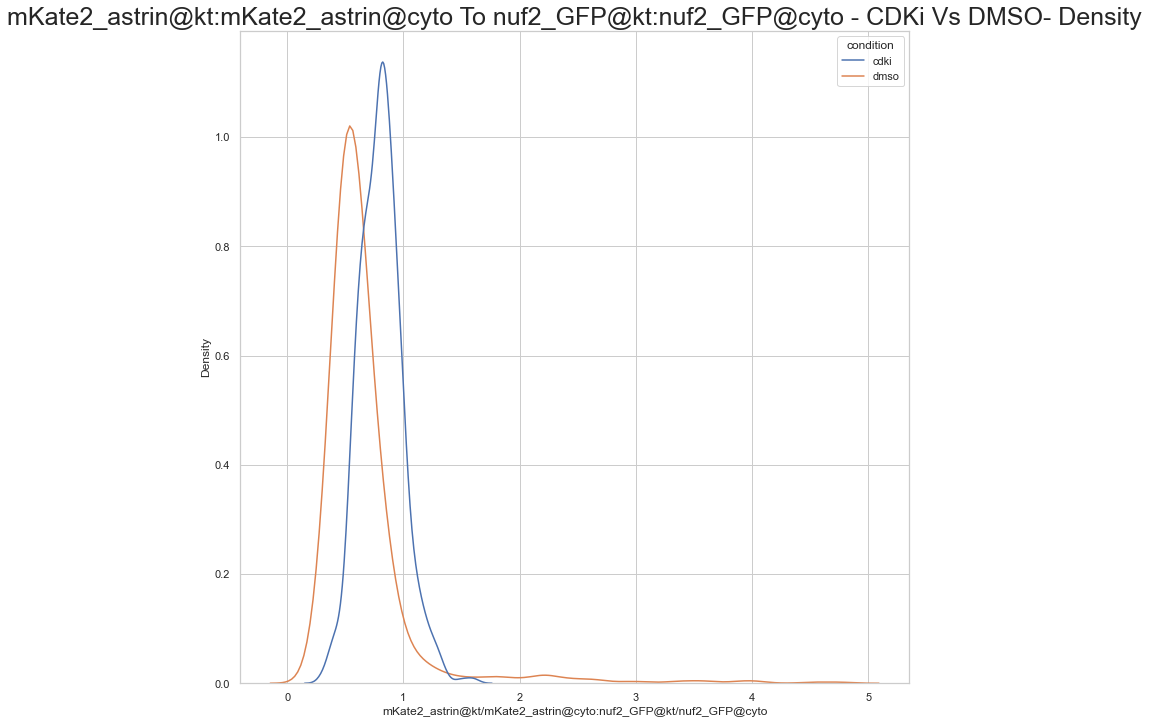

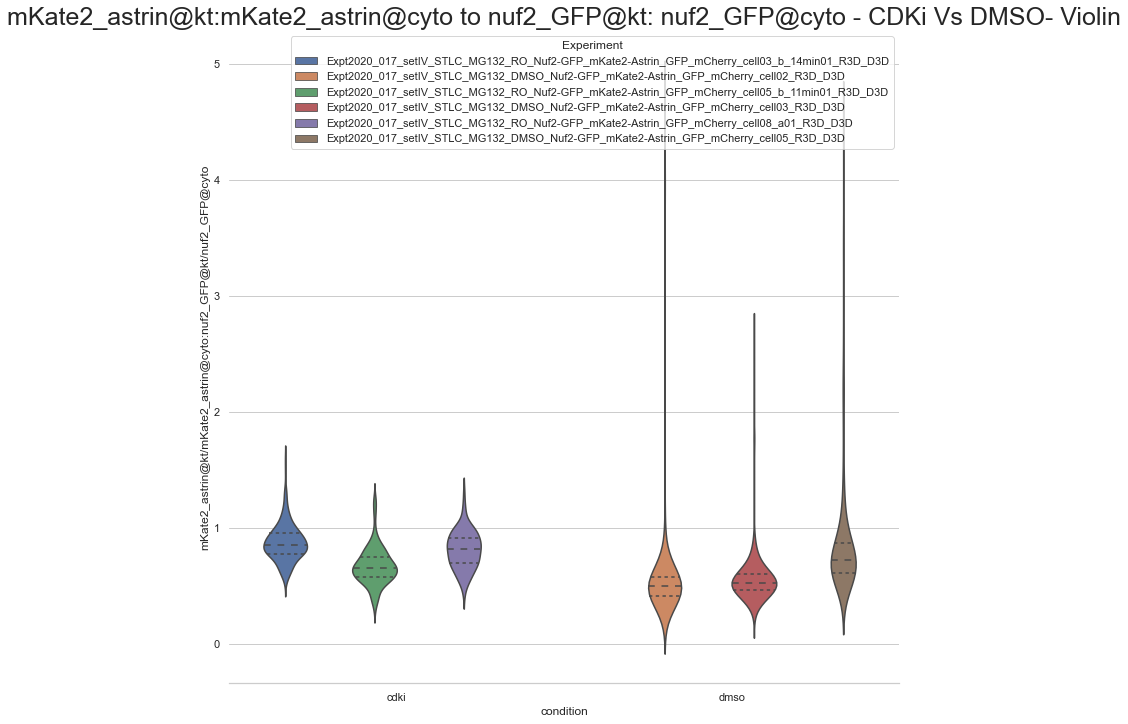

In [14]:
import seaborn as sns
title="mKate2_astrin@kt:mKate2_astrin@cyto To nuf2_GFP@kt:nuf2_GFP@cyto - CDKi Vs DMSO- Density"
plt.figure(figsize=(12,12))
sns.set_theme(style="whitegrid")

sns_plot=sns.kdeplot(data=df_graph, x="mKate2_astrin@kt/mKate2_astrin@cyto:nuf2_GFP@kt/nuf2_GFP@cyto",hue='condition').set_title(title,fontsize=25)
sns_plot.figure.savefig(GRAPH_DIR+title, bbox_inches="tight",dpi=300)

title="mKate2_astrin@kt:mKate2_astrin@cyto to nuf2_GFP@kt: nuf2_GFP@cyto - CDKi Vs DMSO- Violin"
plt.figure(figsize=(12,12))
sns.set_theme(style="whitegrid")
# Draw a nested violinplot and split the violins for easier comparison
sns_plot=sns.violinplot(data=df_graph, x="condition", y="mKate2_astrin@kt/mKate2_astrin@cyto:nuf2_GFP@kt/nuf2_GFP@cyto", hue="Experiment",
              inner="quart",
               ).set_title(title,fontsize=25)

sns_plot.figure.savefig(GRAPH_DIR+title, bbox_inches="tight",dpi=300)
sns.despine(left=True)

plt.show()

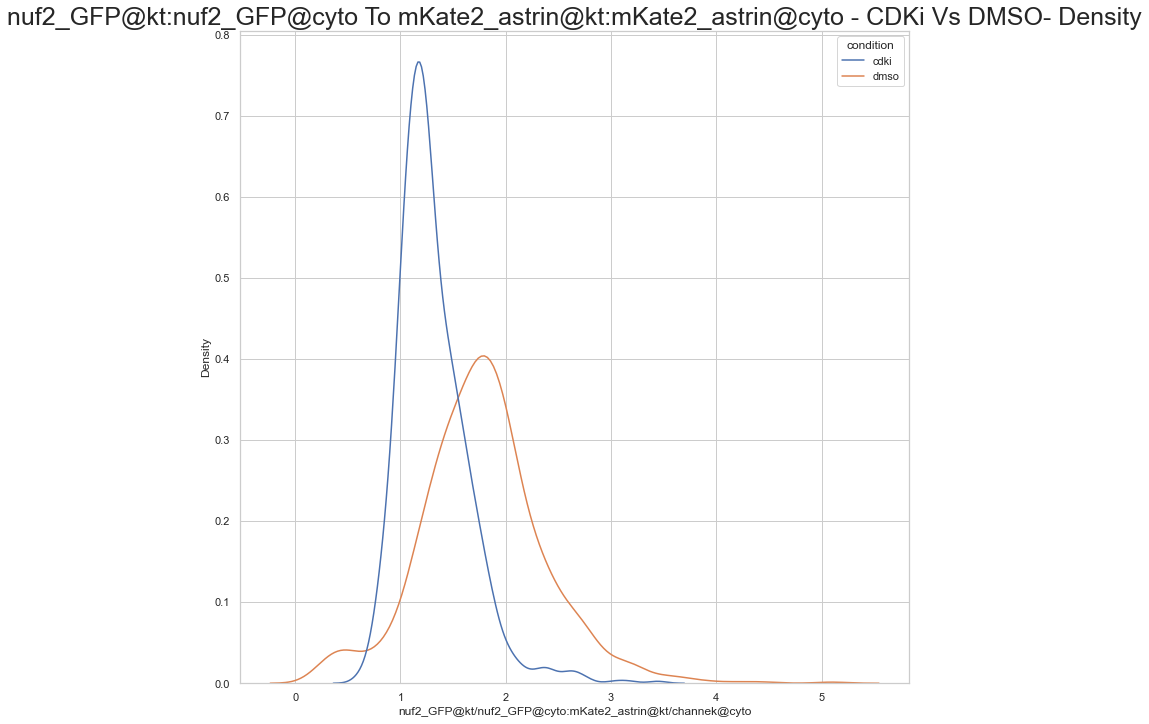

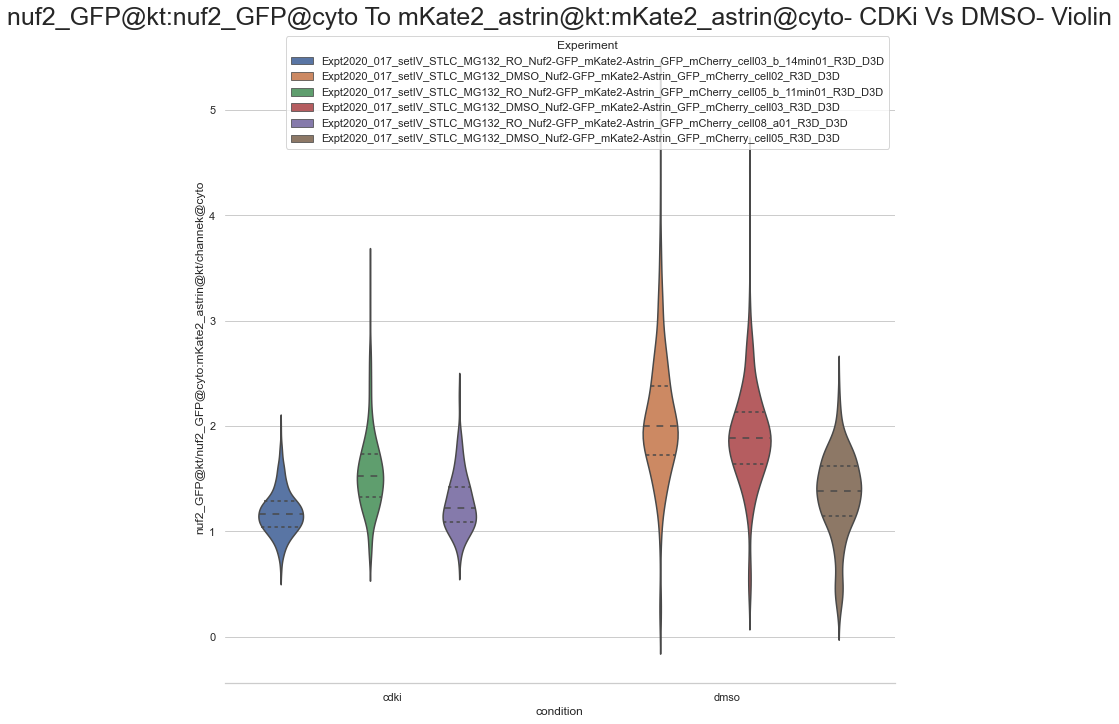

In [15]:
import seaborn as sns
title="nuf2_GFP@kt:nuf2_GFP@cyto To mKate2_astrin@kt:mKate2_astrin@cyto - CDKi Vs DMSO- Density"
plt.figure(figsize=(12,12))
sns.set_theme(style="whitegrid")

sns_plot=sns.kdeplot(data=df_graph, x="nuf2_GFP@kt/nuf2_GFP@cyto:mKate2_astrin@kt/channek@cyto",hue='condition').set_title(title,fontsize=25)
sns_plot.figure.savefig(GRAPH_DIR+title, bbox_inches="tight",dpi=300)

title="nuf2_GFP@kt:nuf2_GFP@cyto To mKate2_astrin@kt:mKate2_astrin@cyto- CDKi Vs DMSO- Violin"
plt.figure(figsize=(12,12))
sns.set_theme(style="whitegrid")
# Draw a nested violinplot and split the violins for easier comparison
sns_plot=sns.violinplot(data=df_graph, x="condition", y='nuf2_GFP@kt/nuf2_GFP@cyto:mKate2_astrin@kt/channek@cyto', hue="Experiment",
              inner="quart",
               ).set_title(title,fontsize=25)

sns_plot.figure.savefig(GRAPH_DIR+title, bbox_inches="tight",dpi=300)
sns.despine(left=True)

plt.show()

<Figure size 864x864 with 0 Axes>

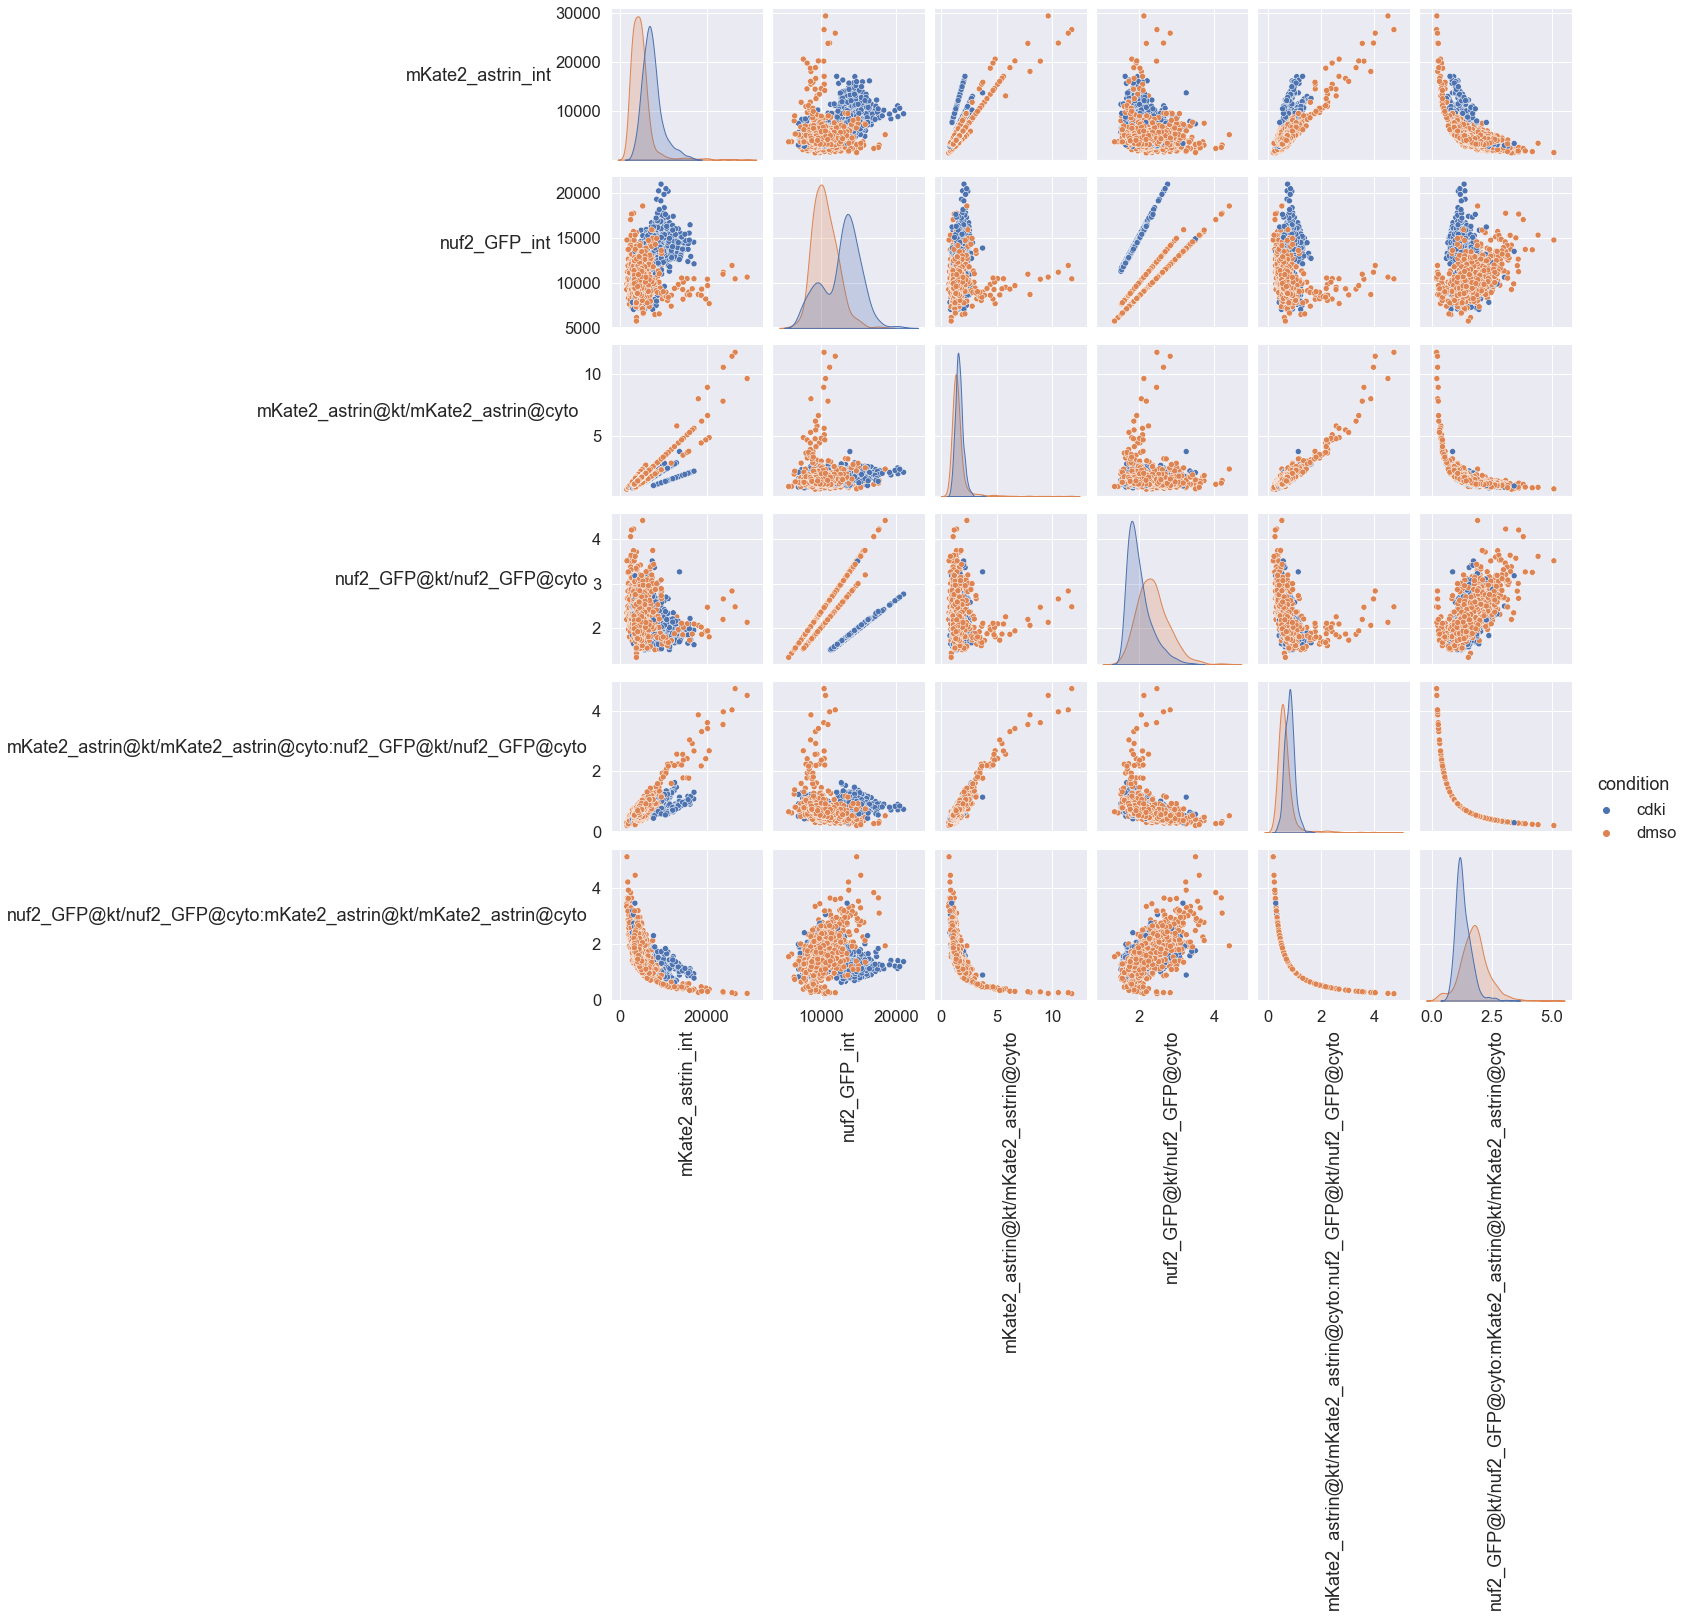

In [18]:
plt.figure(figsize=(12,12))
sns.set(font_scale=1.5)
title='PairPlot - Condition'
sns_plot=sns.pairplot(df_graph, hue="condition")

replacements = {'mean_intensity_mKate2_astrin': 'mKate2_astrin_int','mean_intensity_nuf2_GFP': 'nuf2_GFP_int',
                'mKate2_astrin@kt/mKate2_astrin@cyto': 'mKate2_astrin@kt/mKate2_astrin@cyto',
                'nuf2_GFP@kt/nuf2_GFP@cyto': 'nuf2_GFP@kt/nuf2_GFP@cyto','nuf2_GFP@kt/nuf2_GFP@cyto:mKate2_astrin@kt/channek@cyto':'nuf2_GFP@kt/nuf2_GFP@cyto:mKate2_astrin@kt/mKate2_astrin@cyto',
               'mKate2_astrin@kt/mKate2_astrin@cyto:nuf2_GFP@kt/nuf2_GFP@cyto':'mKate2_astrin@kt/mKate2_astrin@cyto:nuf2_GFP@kt/nuf2_GFP@cyto'}
for i in range(6):
    for j in range(6):
        xlabel = sns_plot.axes[i][j].get_xlabel()
        ylabel = sns_plot.axes[i][j].get_ylabel()
        if xlabel in replacements.keys():
            sns_plot.axes[i][j].set_xlabel(replacements[xlabel],rotation=90)
           
        if ylabel in replacements.keys():
            sns_plot.axes[i][j].set_ylabel(replacements[ylabel],rotation=0,ha="right")
            
            


sns_plot.savefig(GRAPH_DIR+title, bbox_inches="tight",dpi=300)
plt.show()

<Figure size 864x864 with 0 Axes>

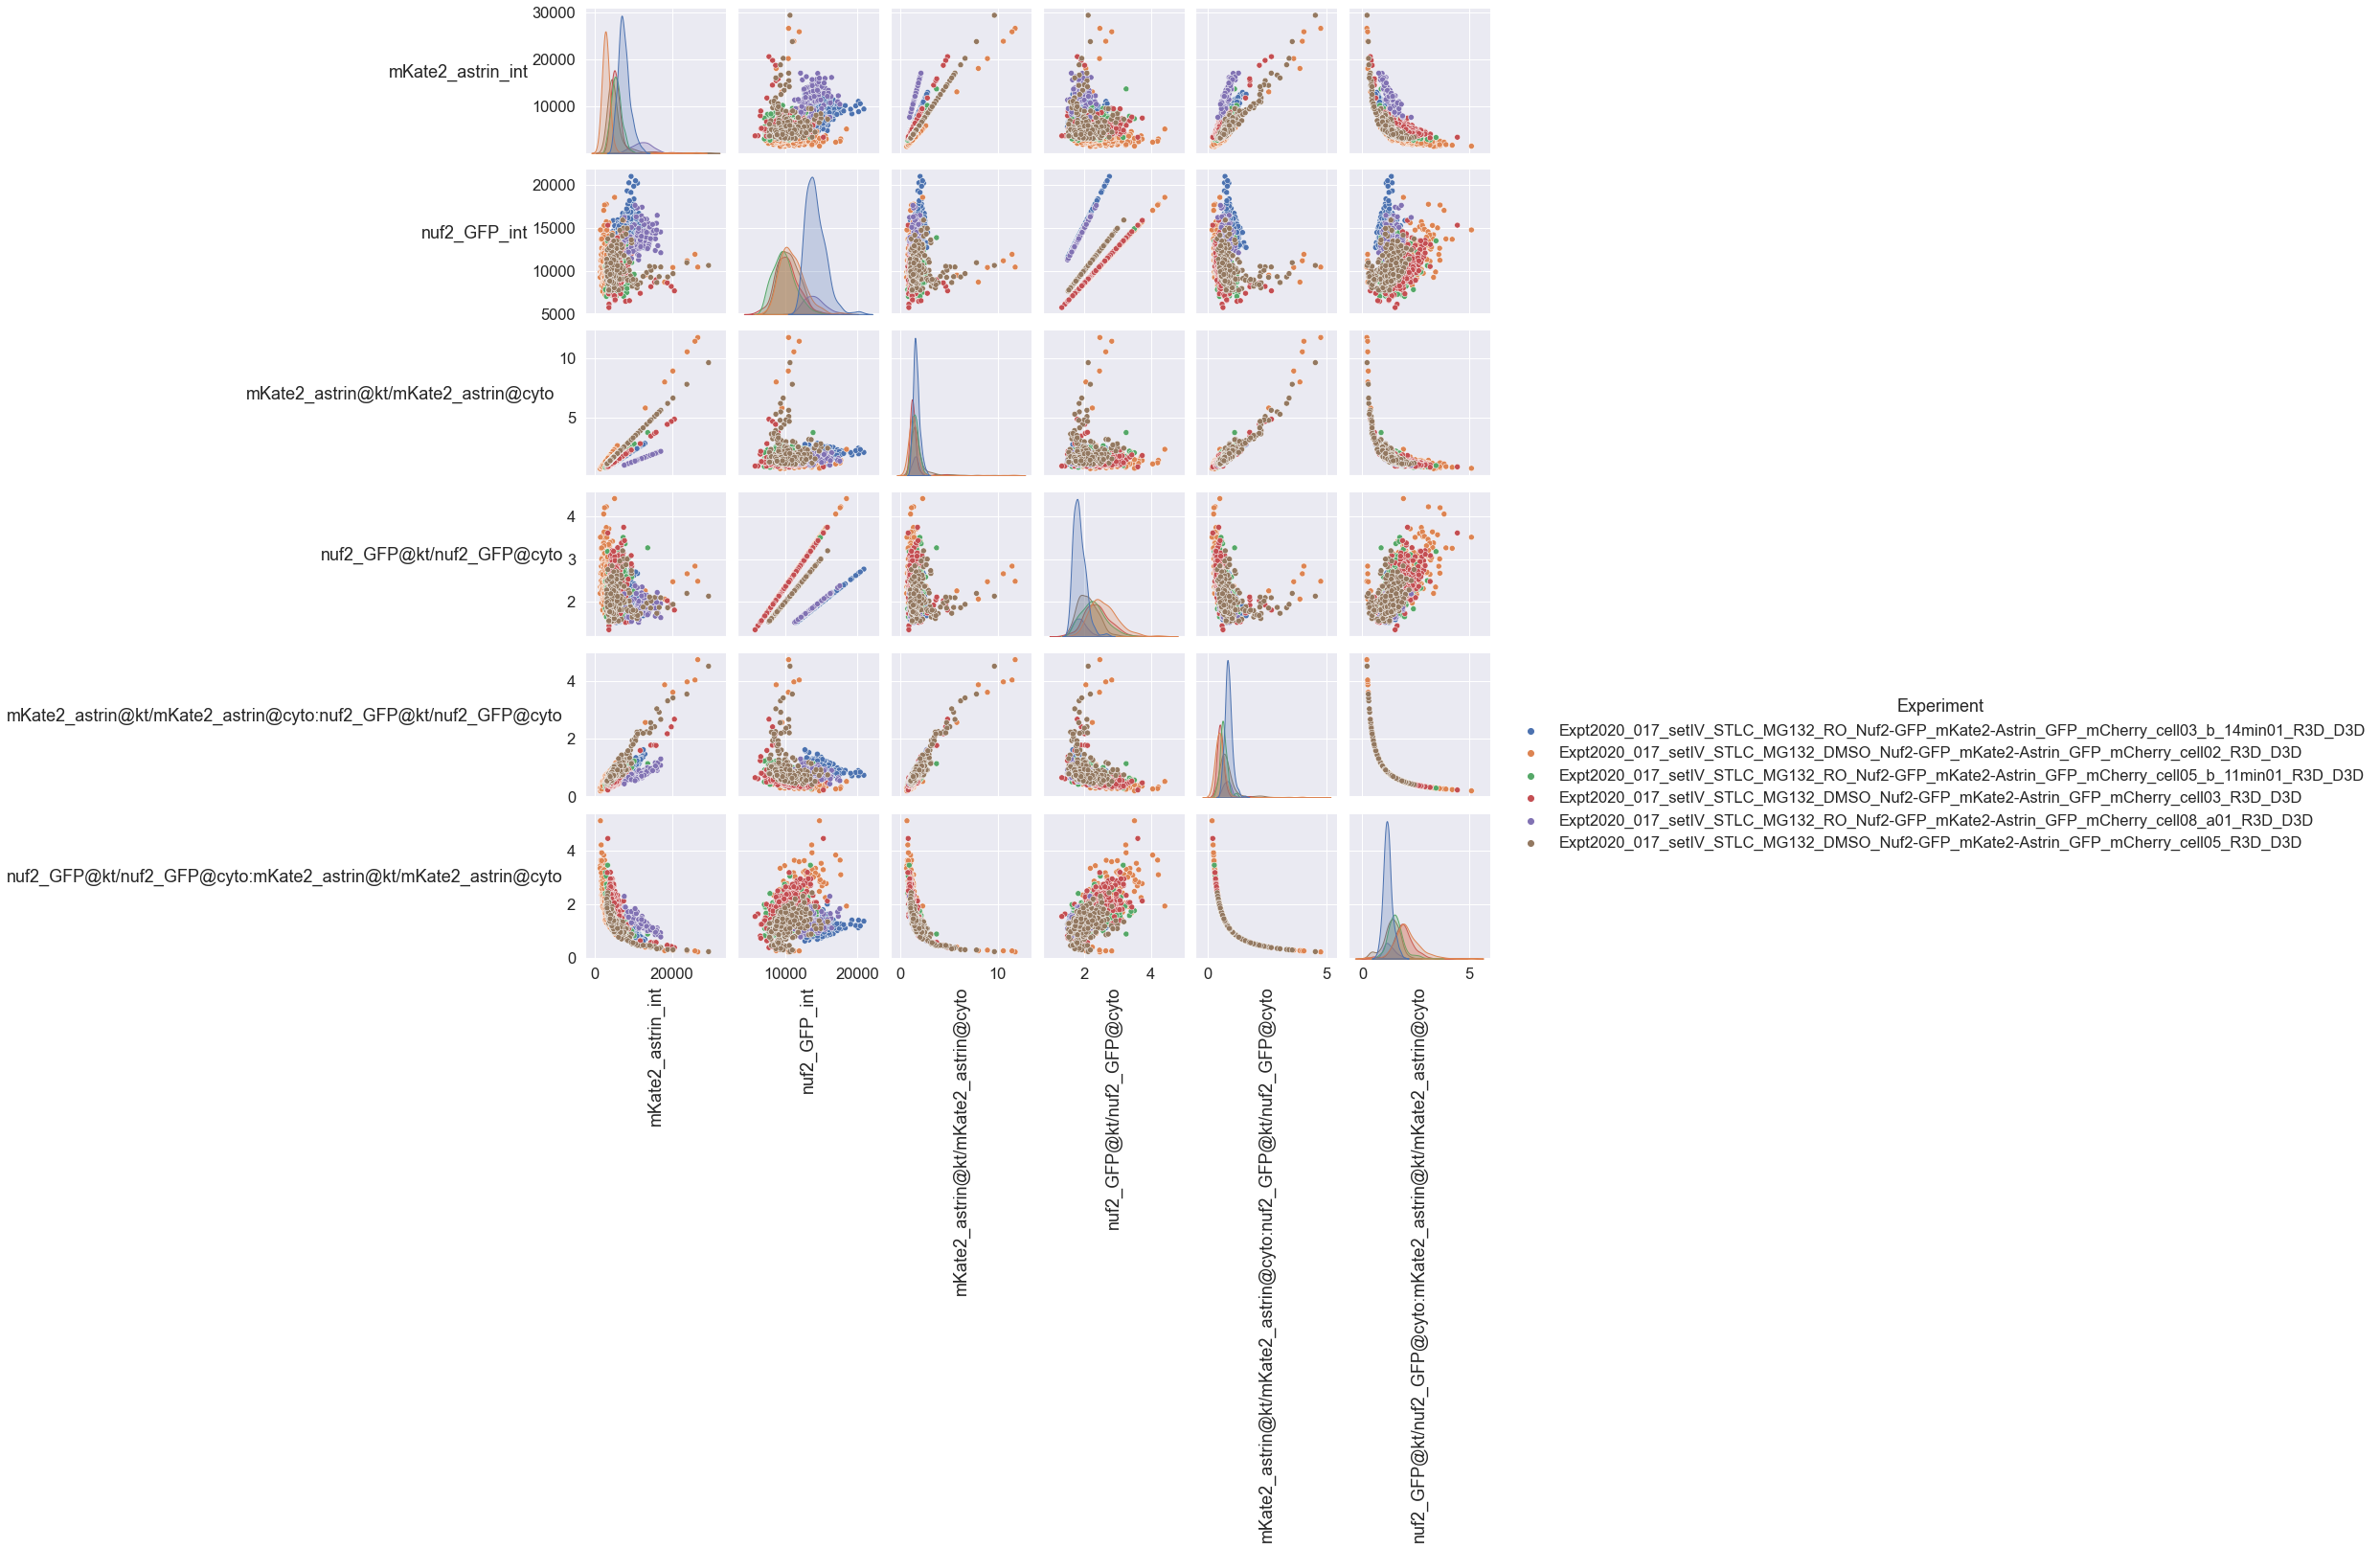

In [19]:
plt.figure(figsize=(12,12))
title="PairPlot - Experiment"
sns.set(font_scale=1.5)

sns_plot=sns.pairplot(df_graph, hue="Experiment")

replacements = {'mean_intensity_mKate2_astrin': 'mKate2_astrin_int','mean_intensity_nuf2_GFP': 'nuf2_GFP_int',
                'mKate2_astrin@kt/mKate2_astrin@cyto': 'mKate2_astrin@kt/mKate2_astrin@cyto',
                'nuf2_GFP@kt/nuf2_GFP@cyto': 'nuf2_GFP@kt/nuf2_GFP@cyto','nuf2_GFP@kt/nuf2_GFP@cyto:mKate2_astrin@kt/channek@cyto':'nuf2_GFP@kt/nuf2_GFP@cyto:mKate2_astrin@kt/mKate2_astrin@cyto',
               'mKate2_astrin@kt/mKate2_astrin@cyto:nuf2_GFP@kt/nuf2_GFP@cyto':'mKate2_astrin@kt/mKate2_astrin@cyto:nuf2_GFP@kt/nuf2_GFP@cyto'}
for i in range(6):
    for j in range(6):
        xlabel = sns_plot.axes[i][j].get_xlabel()
        ylabel = sns_plot.axes[i][j].get_ylabel()
        if xlabel in replacements.keys():
            sns_plot.axes[i][j].set_xlabel(replacements[xlabel],rotation=90)
        if ylabel in replacements.keys():
            sns_plot.axes[i][j].set_ylabel(replacements[ylabel],rotation=0,ha="right")

sns_plot.savefig(GRAPH_DIR+title, bbox_inches="tight",dpi=300)
plt.show()